In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path ='/content/drive/MyDrive/647_Отдел по автоматизации и валидации систем управления мастер-данными SAP_ТЗ-(9aa4664).xlsx'
df = pd.read_excel(path, sheet_name='исх данные', header=1)
df.head()

,N заявки,Грузополучатель,Дата,Масса груза,Объем груза,Сумма за доставку,Сумма за товар,Вид перевозки,VIP признак,ЦКГ,Менеджер ЭТМ,Нарушение барьерной цены,Адрес доставки
0,-б.у445.цветочная,Адамант-Строй ООО,2009-07-01,1500,4.0,22000,169401.23,Платная,Да,электромонтажные орг,Комяков А.О.,да,"Санкт-Петербург р-н, Санкт-Петербург г, Цветоч..."
1,-бя130.1373,АЗК-СтройИнжиниринг,2009-07-01,100,1.0,0,18929.95,Бесплатная: VIP,Да,электромонтажные орг,Казаков А.А.,NaN,"Санкт-Петербург р-н, Санкт-Петербург г, Планер..."
2,-б.я360.0003,АСТ,2009-07-01,500,3.0,0,213181.08,Бесплатная: выполнены фин. условия,NaN,электромонтажные орг,Прищепов С.А.,NaN,"Санкт-Петербург р-н, Стрельна г, Львовская ул...."
3,-б.310,ВИПСТРОЙ ООО,2009-07-01,700,7.0,0,90930.62,Бесплатная: VIP,Да,электромонтажные орг,Раду К.И.,NaN,"Санкт-Петербург р-н, Санкт-Петербург г, Корабл..."
4,-б.дс402.54(М2),МАКСИДОМ ООО,2009-07-01,1400,6.0,0,184839.01,Бесплатная: VIP,Да,сети,Балдина Н.Е.,да,"Санкт-Петербург р-н, Санкт-Петербург г, Тельма..."


# Задание 1 (построение диаграмм)
- Используя таблицу с исходными данными постройте диаграмму, на которой будет показана динамика количества доставок по дням
- Используя таблицу с исходными данными постройте диаграмму, на которой будет представлено распределение по долям количества бесплатных доставок по ЦКГ  (столбцы "ЦКГ",  "Сумма за доставку")

1. Используя таблицу с исходными данными постройте диаграмму, на которой будет показана динамика количества доставок по дням

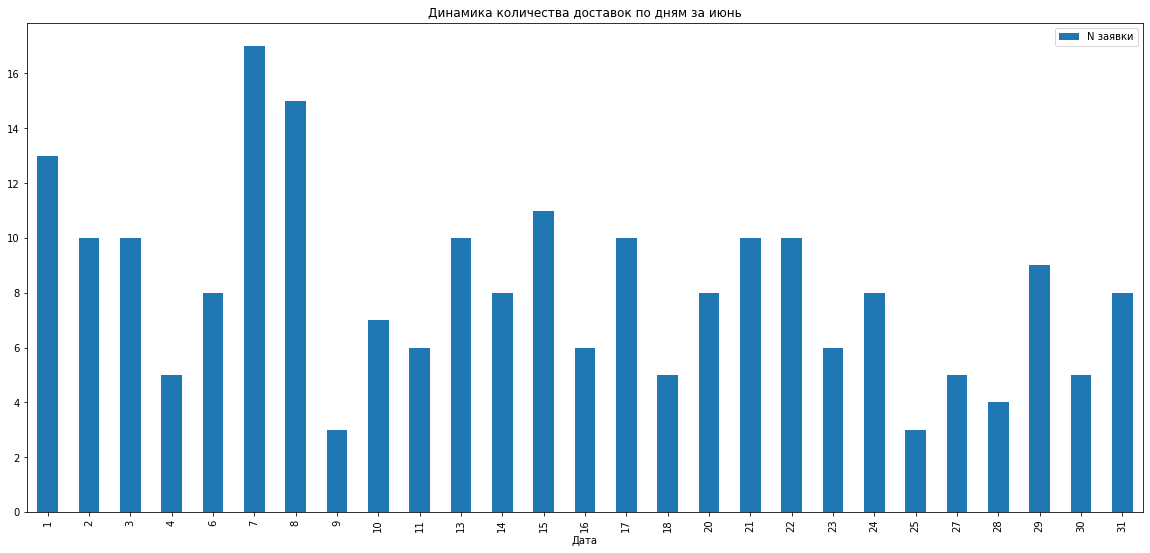

In [ ]:
df.groupby(df['Дата'].dt.day).agg({'N заявки': 'count'}).plot(figsize=(20,9),
                                                          kind="bar", 
                                                          title="Динамика количества доставок по дням за июнь")

2. Используя таблицу с исходными данными постройте диаграмму, на которой будет представлено распределение по долям количества бесплатных доставок по ЦКГ  (столбцы "ЦКГ",  "Сумма за доставку")



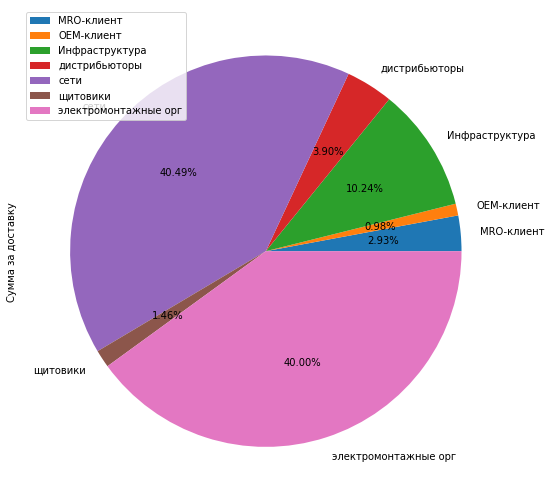

In [ ]:
df.groupby("ЦКГ").\
   agg(lambda x: x.eq(0).sum()).\
   plot(figsize=(20,9),
        kind='pie', 
        y="Сумма за доставку", 
        autopct='%.2f%%')

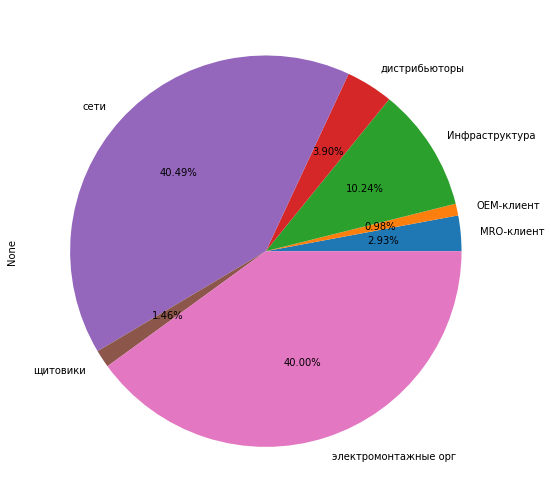

In [ ]:
df.groupby("ЦКГ").\
   apply(lambda df: sum(df['Сумма за доставку'] == 0)).\
   plot(figsize=(20,9), 
        kind='pie', 
        y='Сумма за доставку', 
        autopct='%.2f%%')

# Задание 2 (проверка выполнения условий)

- Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась бесплатная VIP доставка товара при отсутствии признака VIP. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Менеджера ЭТМ.

- Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась доставка товара с нарушением барьерной цены. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Менеджера ЭТМ.

- Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась бесплатная доставка товара на сумму больше 50 000 руб. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Суммы за товар.

In [ ]:
df.columns

Index(['N заявки', 'Грузополучатель', 'Дата', 'Масса груза', 'Объем груза',
       'Сумма за доставку', 'Сумма за товар', 'Вид перевозки', 'VIP признак',
       'ЦКГ', 'Менеджер ЭТМ', 'Нарушение  барьерной цены', 'Адрес доставки'],
      dtype='object')

In [ ]:
column_names = ['Грузополучатель', 'ЦКГ', 'N заявки', 'Менеджер ЭТМ']

1. Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась бесплатная VIP доставка товара при отсутствии признака VIP. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Менеджера ЭТМ.

In [ ]:
df['VIP признак'].unique()

array(['Да', nan], dtype=object)

In [ ]:
df['Вид перевозки'].unique()

array(['Платная', 'Бесплатная: VIP', 'Бесплатная: выполнены фин. условия'],
      dtype=object)

In [ ]:
df_a = df[(df['VIP признак'] != 'Да') & (df['Вид перевозки'] == 'Бесплатная: VIP')].\
  loc[:, column_names]

In [ ]:
df_a

,Грузополучатель,ЦКГ,N заявки,Менеджер ЭТМ
11,ФГУ Алмазова ФЦСКиЭ,Инфраструктура,-б.л3.0107,ООК ОП-2 СПб
61,Тов. чек Белотелов,электромонтажные орг,-б.я330.0007,Белотелов В.Л.
86,Орлиевская Е.М.,дистрибьюторы,-б.л472.70,Дроздов О.Ю.
91,Смит Энд Лайн ООО,дистрибьюторы,-б.я240.00025,Пугач А.В.
155,Лига ООО,электромонтажные орг,-б.в3.2253,Казакевич Н.Н.
158,Северная Компания,электромонтажные орг,-б.л44.412,Кашкин А.А.
183,МИС-248,электромонтажные орг,-б.я154.0263,Павлов М.Ю.
212,Адамант-Строй ООО,электромонтажные орг,-б.у445.призма звезд,Комяков А.О.


2. Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась доставка товара с нарушением барьерной цены. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Менеджера ЭТМ.

In [ ]:
df['Нарушение  барьерной цены'].unique()

array(['да', nan], dtype=object)

In [ ]:
df_b = df[df['Нарушение  барьерной цены'] == 'да'].loc[:, column_names]

In [ ]:
df_b

,Грузополучатель,ЦКГ,N заявки,Менеджер ЭТМ
0,Адамант-Строй ООО,электромонтажные орг,-б.у445.цветочная,Комяков А.О.
4,МАКСИДОМ ООО,сети,-б.дс402.54(М2),Балдина Н.Е.
5,МАКСИДОМ ООО,сети,-б.дс402.55(М5),Балдина Н.Е.
8,СТАРТ УК (МРД),сети,-б.дс402.56,Вольнова И.В.
9,СтройМастер,сети,-б.дс402.53(р),Балдина Н.Е.
...,...,...,...,...
211,СтройМастер,сети,-б.дс402.98э,Балдина Н.Е.
212,Адамант-Строй ООО,электромонтажные орг,-б.у445.призма звезд,Комяков А.О.
216,МАКСИДОМ ООО,сети,-б.дс402.96(м4),Балдина Н.Е.
217,МАКСИДОМ ООО,сети,-б.дс402.91(м1),Балдина Н.Е.


Используя таблицу с исходными данными укажите клиентов (грузополучателей), которым осуществлялась бесплатная доставка товара на сумму больше 50 000 руб. Информацию представить в виде таблицы с указанием: Грузополучателя, ЦКГ, N заявки, Суммы за товар.

In [ ]:
df_c = df[(df['Сумма за доставку'] == 0) & (df['Сумма за товар'] > 50_000 )].\
  loc[:, column_names]

In [ ]:
df_c

,Грузополучатель,ЦКГ,N заявки,Менеджер ЭТМ
2,АСТ,электромонтажные орг,-б.я360.0003,Прищепов С.А.
3,ВИПСТРОЙ ООО,электромонтажные орг,-б.310,Раду К.И.
4,МАКСИДОМ ООО,сети,-б.дс402.54(М2),Балдина Н.Е.
5,МАКСИДОМ ООО,сети,-б.дс402.55(М5),Балдина Н.Е.
6,ПромАвтоматика ООО,дистрибьюторы,-б.я360.0002,Прищепов С.А.
...,...,...,...,...
214,Гусева Е.Г. ИП,сети,-б.дс401.Гусева 4,Вольнова И.В.
216,МАКСИДОМ ООО,сети,-б.дс402.96(м4),Балдина Н.Е.
217,МАКСИДОМ ООО,сети,-б.дс402.91(м1),Балдина Н.Е.
218,МАКСИДОМ ООО,сети,-б.дс402.97(М6),Балдина Н.Е.


# Задание 3 (анализ информации)

- Используя таблицу с исходными данными, укажите клиентов (грузополучателей), которым осуществлялась доставка более 3х раз за месяц. Информацию представить в виде таблицы.

- Используя таблицу с исходными данными, определите ЦКГ с наибольшим удельным весом по среднедневному показателю "сумма за товар". Информацию представить в виде диаграммы или таблицы.

- Используя таблицу с исходными данными, определите ЦКГ, в которых есть клиенты без  менеджера ЭТМ. Информацию представить в виде таблицы.

- Условие:  Клиентам с признаком VIP осуществляется бесплатная VIP доставка товара. Используя таблицу с исходными данными, определите ЦКГ с нарушением данного условия. Какие еще нарушения есть по данному условию? Информацию представить в виде таблицы.

- Используя таблицу исходные данные посчитать 90-ый персентиль по стоимости заявки. По полученным данным определить заявки, которые не входят в этот персентиль. Результат представить в виде таблицы с колонками "N заявки" и "Сумма за товар".

1. Используя таблицу с исходными данными, укажите клиентов (грузополучателей), которым осуществлялась доставка более 3х раз за месяц. Информацию представить в виде таблицы.

In [ ]:
df['Грузополучатель'].value_counts().loc[lambda x: x > 3].to_frame("Доставка").rename_axis('Грузополучатель')

,Доставка
Грузополучатель,
СтройМастер,37
МАКСИДОМ ООО,33
Интексо,11
СТАРТ УК (МРД),7
Шанхайск.Стр.Кор.СЗ,6
Балтийский компл ООО,6
Энергоформ,5
Омега Строй,5
Адамант-Строй ООО,4


2. Используя таблицу с исходными данными, определите ЦКГ с наибольшим удельным весом по среднедневному показателю "сумма за товар". Информацию представить в виде диаграммы или таблицы.

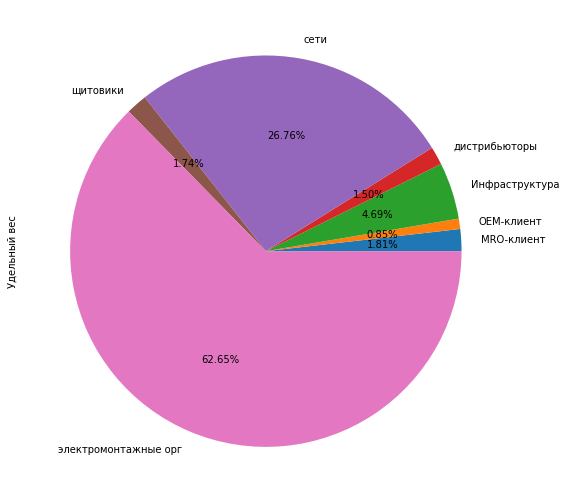

In [ ]:
df_3b = df.groupby('ЦКГ').\
  agg({'Сумма за товар': 'sum'}).\
  rename(columns={'Сумма за товар':'Удельный вес'})/df['Сумма за товар'].sum() * 100

df_3b.plot(kind='pie', y='Удельный вес', figsize=(20,9), autopct='%.2f%%', legend=False)

3. Используя таблицу с исходными данными, определите ЦКГ, в которых есть клиенты без  менеджера ЭТМ. Информацию представить в виде таблицы.

In [ ]:
df['ЦКГ'][df['Менеджер ЭТМ'].isna()].to_frame()

,ЦКГ
29,Инфраструктура
30,Инфраструктура
32,Инфраструктура
56,электромонтажные орг
64,Инфраструктура
94,NaN
98,Инфраструктура
103,Инфраструктура
121,Инфраструктура
134,NaN


4. Условие:  Клиентам с признаком VIP осуществляется бесплатная VIP доставка товара. Используя таблицу с исходными данными, определите ЦКГ с нарушением данного условия. Какие еще нарушения есть по данному условию? Информацию представить в виде таблицы.

In [ ]:
df[(df['Вид перевозки'] != 'Бесплатная: VIP') | (df['VIP признак'] != 'Да')][['ЦКГ', 'VIP признак', 'Вид перевозки']]

,ЦКГ,VIP признак,Вид перевозки
0,электромонтажные орг,Да,Платная
2,электромонтажные орг,NaN,Бесплатная: выполнены фин. условия
6,дистрибьюторы,NaN,Бесплатная: выполнены фин. условия
7,электромонтажные орг,NaN,Бесплатная: выполнены фин. условия
11,Инфраструктура,NaN,Бесплатная: VIP
...,...,...,...
209,электромонтажные орг,NaN,Бесплатная: выполнены фин. условия
210,щитовики,NaN,Бесплатная: выполнены фин. условия
212,электромонтажные орг,NaN,Бесплатная: VIP
213,Инфраструктура,NaN,Бесплатная: выполнены фин. условия


Очень много пропусков.

Есть варианты, что клиента есть VIP, но была выполнена платная перевозка или Бесплатная: выполнены фин.условия

Была выполнена Бесплатня VIP перевозка, но стоит пропуск VIP признака

5. Используя таблицу исходные данные посчитать 90-ый персентиль по стоимости заявки. По полученным данным определить заявки, которые не входят в этот персентиль. Результат представить в виде таблицы с колонками "N заявки" и "Сумма за товар".

In [ ]:
df['стоимость заявки'] = df['Сумма за доставку'] + df['Сумма за товар']
perc_90 = df['стоимость заявки'].quantile(0.9)
df[df['стоимость заявки'] < perc_90][["N заявки" , "Сумма за товар"]]

,N заявки,Сумма за товар
0,-б.у445.цветочная,169401.23
1,-бя130.1373,18929.95
2,-б.я360.0003,213181.08
3,-б.310,90930.62
4,-б.дс402.54(М2),184839.01
...,...,...
214,-б.дс401.Гусева 4,52408.67
215,-б.дс401.Интексо 17,38815.00
216,-б.дс402.96(м4),183065.98
218,-б.дс402.97(М6),120316.00


# Задание 4 (выводы)

Используя таблицу с исходными данными сделайте выводы об  осуществлении доставок в июне:
- по виду перевозки
- по ЦКГ
- о допущенных нарушениях

Информацию представить в свободной форме.

In [ ]:
df['Вид перевозки'].value_counts()

Бесплатная: VIP                       128
Бесплатная: выполнены фин. условия     80
Платная                                12
Name: Вид перевозки, dtype: int64

По виду перевозки:
- В 7 и 8 дени июня были осуществлены больше всего перевозок
- Чаще всего в июне были перевозка "Бесплатная: VIP" 
- Чаще всех в тюне товар доставляли в СтройМастер и в МАКСИДОМ ООО

по ЦКГ:
- Бесплатных доставок было больше всего в Сети и электромонтажные орг
- Но и удельному весу по среднедневному показателю "сумма за товар" занимают первые места, больше всего у электромонтажных организациях 

о допущенных нарушениях:
- Присуствуют пропуски. Например если была "Бесплатная: VIP" перевозка, то не всегда присуствует признак VIP
- Пропуски в колонке "Менеджер ЭТМ"


# Задание 5 (впр)

- Используя данные на листе "ВПР", заполните в таблице стоимость доставки в столбцах V и VI  по производителям:

In [ ]:
path ='/content/drive/MyDrive/647_Отдел по автоматизации и валидации систем управления мастер-данными SAP_ТЗ-(9aa4664).xlsx'
df_vpr = pd.read_excel(path, sheet_name='впр', header=0)
df_vpr.head()

,N п/п,код производителя,производитель,стоимость доставки за IV квартал 2008 года РЦ СЗ,стоимость доставки за IV квартал 2008 года РЦ Центр
0,1,58350,3М Россия ЗАО,0.0,4.966
1,2,51734,ELDIN,0.0,14.300
2,3,59710,Lena Lighting S.A.,0.0,0.275
3,4,51920,SABAJ,0.0,9.239
4,5,57401,Vergokan,0.0,0.000


In [ ]:
df_vpr.shape

(199, 5)

In [ ]:
path ='/content/drive/MyDrive/647_Отдел по автоматизации и валидации систем управления мастер-данными SAP_ТЗ-(9aa4664).xlsx'
df_task5 = pd.read_excel(path, sheet_name='задание 5', header=5)
df_task5.head()

,код производителя,производитель,класс производителя,платность доставки (да/нет),стоимость доставки за IV квартал 2008 года РЦ СЗ,стоимость доставки за IV квартал 2008 года РЦ Центр
0,5180,Хэлп ЗАО,NaN,да,NaN,NaN
1,5658,ТрансВит,NaN,да,NaN,NaN
2,7674,"КСК-Электро(КСК-Лампадари, Светон)",NaN,да,NaN,NaN
3,8198,ЭТА ООО,NaN,да,NaN,NaN
4,8536,Осрам ОАО г.Смоленск,NaN,да,NaN,NaN


In [ ]:
df_task5.shape

(148, 6)

In [ ]:
df1 = df_task5.set_index('код производителя')
df2 = df_vpr.set_index('код производителя')
df_result = df1.combine_first(df2)

In [ ]:
df_result

,N п/п,класс производителя,платность доставки (да/нет),производитель,стоимость доставки за IV квартал 2008 года РЦ СЗ,стоимость доставки за IV квартал 2008 года РЦ Центр
код производителя,,,,,,
5180,160.0,NaN,да,Хэлп ЗАО,0.0,26.474
5491,173.0,NaN,NaN,Электрокабель Кольч,228.0,96.000
5658,149.0,NaN,да,ТрансВит,0.0,6.356
6571,48.0,NaN,Нет,Завод ЭМИ Нижн. Новг,1.8,0.000
7138,117.0,NaN,NaN,Ревд.УПП ВОС-НЕ ПРИХ,0.0,0.000
...,...,...,...,...,...,...
81120834,89.0,NaN,NaN,Норма-Кабель ТК ООО,0.0,1.487
81121375,124.0,NaN,NaN,РЭД-ПЛАСТ ООО Мск,0.5,0.000
81126172,17.0,NaN,NaN,Балткабель ЗАО,0.0,0.000


# Задание 6

- Для работы над нижеописанными задачами используйте листы "Условия к заданию 6", "Сводная"

- В таблицу 1 проставьте названия городов из таблицы 2 в соответствии с кодами городов, а также стоимость по каждой строке.

- В таблице 2 посчитайте суммы по каждому городу из таблицы 1.

- Проставьте в таблице 1 статус каждой строки из таблицы 3 в зависимости от стоимости.

- На листе "Сводная" создайте сводную таблицу из таблицы 1, отражающую суммы по каждому городу и статусу.

- Создайте формулу, которая в ячейку D10 поместит из таблицы 1 общую стоимость по позициям, по которым количество больше 50.